In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot


In [128]:
data= pd.read_csv(r"D:\Excel R\Data Science Assignments\Multiple Linear Regression\toyota.csv",encoding='latin1')

In [129]:
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [131]:
data.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [132]:
data['Price'].unique()

array([13500, 13750, 13950, 14950, 12950, 16900, 18600, 21500, 20950,
       19950, 19600, 22500, 22000, 22750, 17950, 16750, 16950, 15950,
       16250, 17495, 15750, 15500, 14750, 19000, 15800, 21950, 20500,
       13250, 15250, 18950, 15999, 16500, 18750, 22250, 12995, 18450,
       16895, 14900, 17250, 15450, 16650, 17450, 16450, 18900, 18990,
       18500, 19450, 18800, 32500, 31000, 31275, 24950, 22950, 24990,
       17900, 19250, 16350, 21750, 15850, 23000, 19900, 23950, 24500,
       17200, 19500, 16868, 19750, 20750, 17650, 17795, 18245, 23750,
       18700, 21125,  6950,  9500, 11950,  7750,  4350,  4750, 11750,
       11900,  9950, 11495, 11250, 10500, 10450, 11500, 12500, 10950,
       11450, 11790, 12450, 11690, 12750, 11925, 12900, 11650, 10850,
        9940, 13450, 12495, 12000, 11480, 14990, 12850, 11700, 11895,
       13875, 12295, 13995,  9900, 11990, 10750, 11695, 11000, 12400,
       12200, 12695, 14350, 10250,  6500,  6400,  7000,  8900,  8500,
        8950,  9250,

In [133]:
data['Age_08_04'].unique()

array([23, 24, 26, 30, 32, 27, 25, 22, 31, 28, 29, 20, 19, 16, 17, 11, 18,
       13, 14,  4,  8,  7, 15, 10, 12,  9,  6,  2,  1, 43, 38, 40, 44, 41,
       37, 39, 42, 35, 34, 33, 36, 53, 51, 54, 45, 55, 48, 52, 49, 56, 50,
       47, 46, 58, 68, 59, 62, 65, 67, 64, 60, 61, 66, 57, 63, 73, 79, 78,
       74, 77, 69, 80, 76, 70, 71, 75, 72], dtype=int64)

# By considering the only important Features 

In [134]:
data=data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [135]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


# Data PreProcessing

In [136]:
data.shape

(1436, 9)

In [137]:
data=data.rename({'Age_08_04':'Age_04_mnths','cc':'CC'},axis=1)

In [138]:
data

,Price,Age_04_mnths,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [139]:
data.dtypes

Price            int64
Age_04_mnths     int64
KM               int64
HP               int64
CC               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [140]:
data.describe()

,Price,Age_04_mnths,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


# 4Bussiness Moments

In [141]:
data.mean()

Price            10730.824513
Age_04_mnths        55.947075
KM               68533.259749
HP                 101.502089
CC                1576.855850
Doors                4.033426
Gears                5.026462
Quarterly_Tax       87.122563
Weight            1072.459610
dtype: float64

In [142]:
data.median()

Price             9900.0
Age_04_mnths        61.0
KM               63389.5
HP                 110.0
CC                1600.0
Doors                4.0
Gears                5.0
Quarterly_Tax       85.0
Weight            1070.0
dtype: float64

In [143]:
data.std()

Price             3626.964585
Age_04_mnths        18.599988
KM               37506.448872
HP                  14.981080
CC                 424.386770
Doors                0.952677
Gears                0.188510
Quarterly_Tax       41.128611
Weight              52.641120
dtype: float64

In [144]:
data.var()

Price            1.315487e+07
Age_04_mnths     3.459596e+02
KM               1.406734e+09
HP               2.244327e+02
CC               1.801041e+05
Doors            9.075927e-01
Gears            3.553619e-02
Quarterly_Tax    1.691563e+03
Weight           2.771088e+03
dtype: float64

In [145]:
data.skew()

Price             1.703885
Age_04_mnths     -0.826702
KM                1.015912
HP                0.955836
CC               27.431793
Doors            -0.076395
Gears             2.283960
Quarterly_Tax     1.993834
Weight            3.108639
dtype: float64

In [146]:
data.kurtosis()

Price              3.737781
Age_04_mnths      -0.076632
KM                 1.685057
HP                 8.836434
CC               930.711227
Doors             -1.874765
Gears             37.703476
Quarterly_Tax      4.298345
Weight            19.362901
dtype: float64

# Checking for Missing values and Outliers

In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_04_mnths   1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   CC             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [148]:
data.isnull().sum()

Price            0
Age_04_mnths     0
KM               0
HP               0
CC               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

<AxesSubplot:>

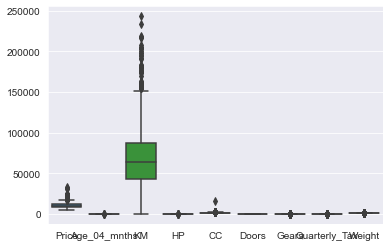

In [149]:
sns.boxplot(data=data)

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='KM'>

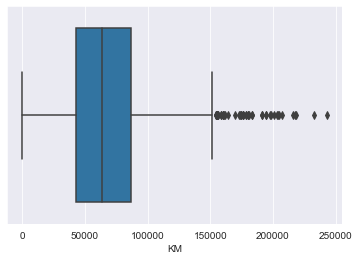

In [150]:
sns.boxplot(data.KM)

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

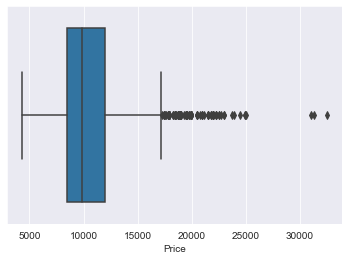

In [151]:
sns.boxplot(data.Price)

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HP'>

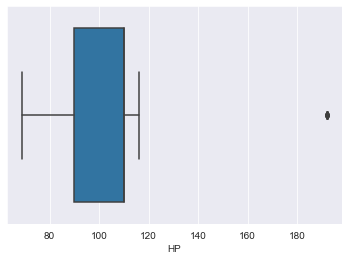

In [152]:
sns.boxplot(data.HP)

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CC'>

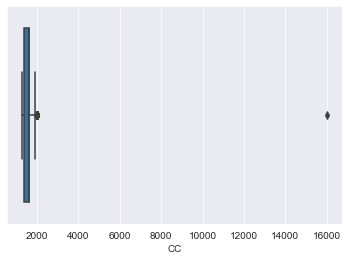

In [153]:
sns.boxplot(data.CC)

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_04_mnths'>

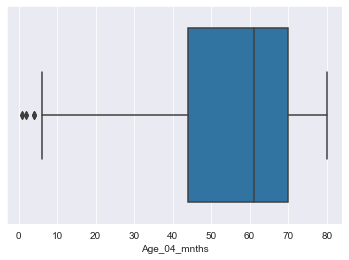

In [154]:
sns.boxplot(data.Age_04_mnths)

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

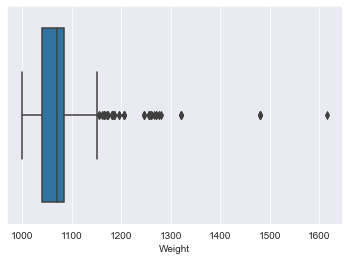

In [155]:
sns.boxplot(data.Weight)

# Plots and Graphs

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='KM', ylabel='Density'>

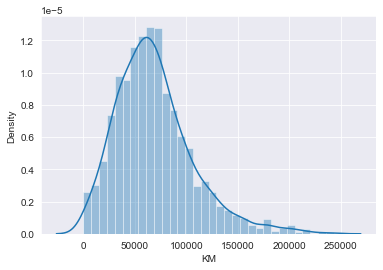

In [156]:
sns.distplot(data['KM'])

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_04_mnths', ylabel='Density'>

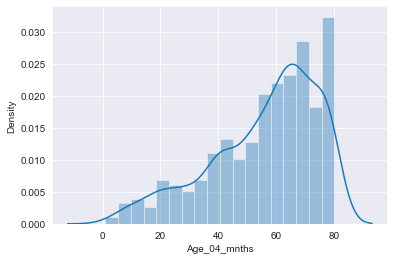

In [157]:
sns.distplot(data['Age_04_mnths'])

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

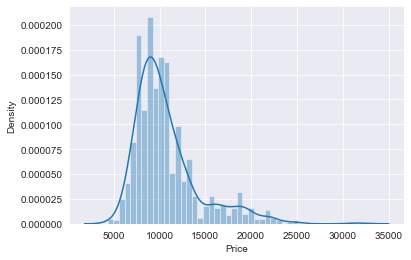

In [158]:
sns.distplot(data['Price'])

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='HP', ylabel='Density'>

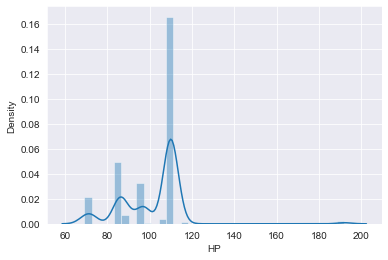

In [159]:
sns.distplot(data['HP'])

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CC', ylabel='Density'>

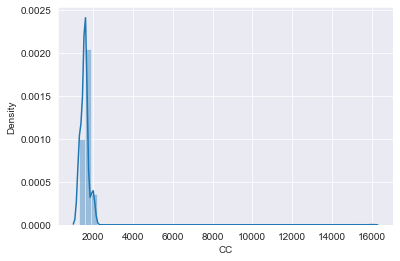

In [160]:
sns.distplot(data['CC'])

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Doors', ylabel='Density'>

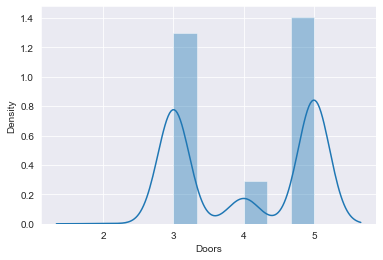

In [161]:
sns.distplot(data['Doors'])

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gears', ylabel='Density'>

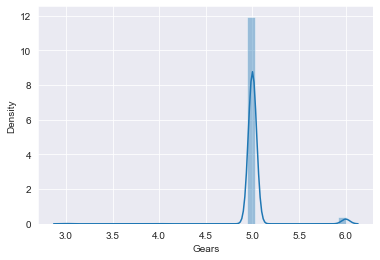

In [162]:
sns.distplot(data['Gears'])

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quarterly_Tax', ylabel='Density'>

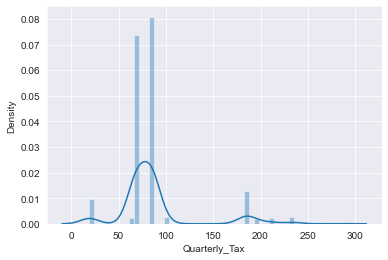

In [163]:
sns.distplot(data['Quarterly_Tax'])

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

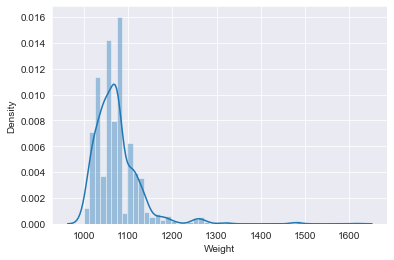

In [164]:
sns.distplot(data['Weight'])

# Correlation 

In [165]:
data.corr()

,Price,Age_04_mnths,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_04_mnths,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


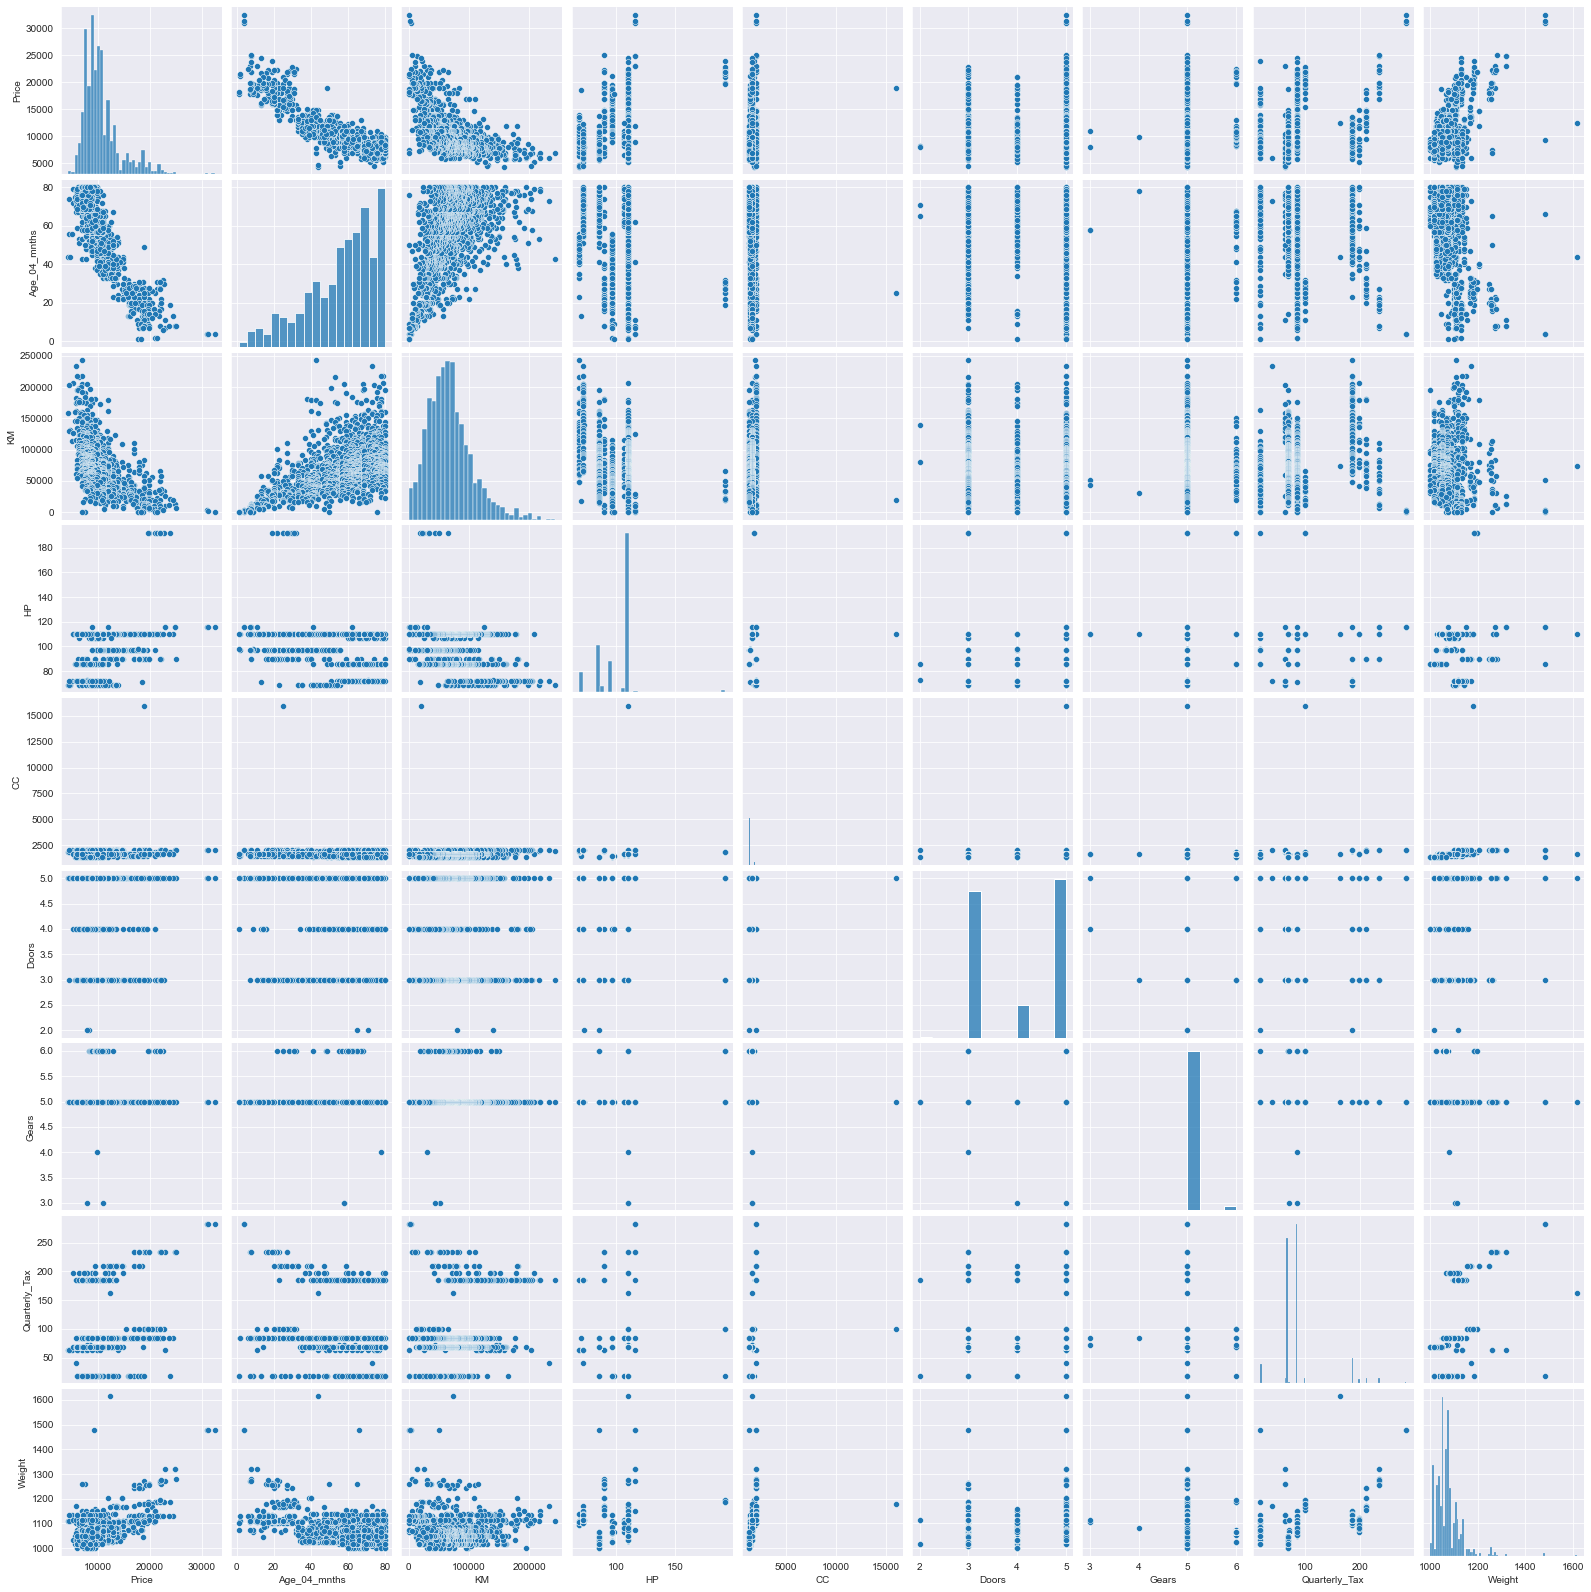

In [166]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

# Checking For the Best Fit Model OLS


In [167]:
import statsmodels.formula.api as smf
all_vars=smf.ols("Price~CC+HP+Age_04_mnths+KM+Gears+Doors+Quarterly_Tax+Weight",data=data).fit()

In [170]:
all_vars.summary()#==> CC,Doors,

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        20:23:30   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
CC               -0.1211      0.090     -1.344      0.179      -0.298       0.056
HP               31.6809      2.818     11.241      0.000      26.152      37.209
Age_04_mnths   -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here we have multiple IN-Significant Values now lets check with independently  by using SLR technique to check

In [ ]:
Checking with CC with Dependent variable Using SlR techinque

In [175]:
with_CC=smf.ols("Price~CC",data=data).fit()
with_CC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 25 May 2021   Prob (F-statistic):           1.55e-06
Time:                        20:23:57   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
CC             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking with Doors and Dependent Variable

In [176]:
with_Doors=smf.ols("Price~Doors",data=data).fit()
with_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 25 May 2021   Prob (F-statistic):           1.46e-12
Time:                        20:23:58   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By Combining Both In-significant values

In [178]:
with_both=smf.ols("Price~CC+Doors",data=data).fit()
with_both.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Tue, 25 May 2021   Prob (F-statistic):           1.15e-15
Time:                        20:23:59   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
CC             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Drop one by one 

In [180]:
out_weight=smf.ols("Price~+HP+Age_04_mnths+KM+Gears+Doors+Quarterly_Tax+CC",data=data).fit()
out_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1069.
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        20:23:59   Log-Likelihood:                -12492.
No. Observations:                1436   AIC:                         2.500e+04
Df Residuals:                    1428   BIC:                         2.504e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9980.6587   1101.951      9.057      0.000    7819.042    1.21e+04
HP               43.5743      2.946     14.790      0.000      37.795      49.354
Age_04_mnths   -136.3855      2.652    -51.426      0.000    -141.588    -131.183
KM               -0.0201      0.001    -14.793      0.000      -0.023      -0.017
Gears           620.1432    213.676      2.902      0.004     200.990    1039.296
Doors           157.9483     41.991      3.762      0.000      75.578     240.318
Quarterly_Tax    16.1981      1.148     14.108      0.000      13.946      18.450
CC                0.1066      0.096      1.106      0.269      -0.083       0.296
==============================================================================
Omnibus:                      211.411   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.784
Skew:                           0.690   Prob(JB):                    5.15e-167
Kurtosis:                       6.301   Cond. No.                     2.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [181]:
out_quaterly=smf.ols("Price~CC+HP+Age_04_mnths+KM+Gears+Doors+Weight",data=data).fit()
out_quaterly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1284.
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        20:24:00   Log-Likelihood:                -12380.
No. Observations:                1436   AIC:                         2.478e+04
Df Residuals:                    1428   BIC:                         2.482e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -7116.7137   1318.946     -5.396      0.000   -9703.993   -4529.435
CC              -0.0881      0.090     -0.983      0.326      -0.264       0.088
HP              28.4809      2.618     10.878      0.000      23.345      33.617
Age_04_mnths  -122.2345      2.616    -46.725      0.000    -127.366    -117.103
KM              -0.0199      0.001    -16.344      0.000      -0.022      -0.017
Gears          620.4166    197.422      3.143      0.002     233.149    1007.684
Doors          -10.6794     40.005     -0.267      0.790     -89.155      67.796
Weight          18.8542      0.866     21.781      0.000      17.156      20.552
==============================================================================
Omnibus:                      206.192   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1656.639
Skew:                          -0.400   Prob(JB):                         0.00
Kurtosis:                       8.201   Cond. No.                     2.92e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
out_doors=smf.ols("Price~CC+HP+Age_04_mnths+KM+Gears+Weight+Quarterly_Tax",data=data).fit()
out_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        20:43:42   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
CC               -0.1210      0.090     -1.344      0.179      -0.298       0.056
HP               31.6728      2.810     11.270      0.000      26.160      37.186
Age_04_mnths   -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [206]:
out_cc=smf.ols("Price~HP+Age_04_mnths+KM+Gears+Doors+Quarterly_Tax+Weight",data=data).fit()
out_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1291.
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        20:45:51   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5477.5069   1409.995     -3.885      0.000   -8243.391   -2711.623
HP               31.3306      2.807     11.161      0.000      25.824      36.837
Age_04_mnths   -121.7000      2.616    -46.518      0.000    -126.832    -116.568
KM               -0.0209      0.001    -16.756      0.000      -0.023      -0.018
Gears           598.2602    197.089      3.035      0.002     211.645     984.875
Doors            -0.7545     40.012     -0.019      0.985     -79.243      77.734
Quarterly_Tax     3.7352      1.301      2.872      0.004       1.184       6.287
Weight           16.7301      1.055     15.864      0.000      14.661      18.799
==============================================================================
Omnibus:                      148.064   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              968.063
Skew:                          -0.208   Prob(JB):                    6.13e-211
Kurtosis:                       7.001   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Calculate Variance Inflation Factor

In [182]:
rsq_cc=smf.ols("CC~Age_04_mnths+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_age=smf.ols("Age_04_mnths~CC+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols("KM~Age_04_mnths+CC+HP+Doors+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared
vif_km=1/(1-rsq_km)


rsq_hp=smf.ols("HP~Age_04_mnths+KM+CC+Doors+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared
vif_hp=1/(1-rsq_hp)


rsq_doors=smf.ols("Doors~Age_04_mnths+KM+HP+CC+Gears+Quarterly_Tax+Weight",data=data).fit().rsquared
vif_doors=1/(1-rsq_doors)


rsq_gear=smf.ols("Gears~Age_04_mnths+KM+HP+Doors+CC+Quarterly_Tax+Weight",data=data).fit().rsquared
vif_gear=1/(1-rsq_gear)


rsq_quaterly=smf.ols("Quarterly_Tax~Age_04_mnths+KM+HP+Doors+Gears+CC+Weight",data=data).fit().rsquared
vif_quaterly=1/(1-rsq_quaterly)

rsq_weight=smf.ols("Weight~+KM+HP+Doors+Gears+Quarterly_Tax+CC+Age_04_mnths+CC",data=data).fit().rsquared
vif_weight=1/(1-rsq_weight)


In [183]:
d1=({'Variables':['CC','Age_04_mnths','KM','HP','Doors','Gears','Quarterly_Tax','Weight'],
     'VIF' :[vif_cc,vif_age,vif_km,vif_hp,vif_doors,vif_gear,vif_quaterly,vif_weight]})

In [184]:
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,CC,1.163894
1,Age_04_mnths,1.884620
2,KM,1.756905
3,HP,1.419422
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


By Observing the VIF values in the above can say that there is NO Mutlicollinearity Probelem exist there is no VIF values more than  5 or 10 if the vif values are greater than 5 or 10  then it considerd as  a problem of Multicollinearity


# Residual Analysis

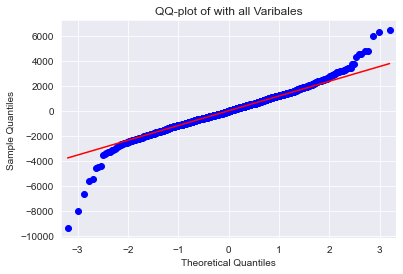

In [185]:
#QQ-plot
import statsmodels.api as sm
qqplot=sm.qqplot(all_vars.resid,line='q')
plt.title("QQ-plot of with all Varibales")
plt.show()

from the above graph we observe that quantiles of Residualas ar moderately Normally  distributed

In [187]:
l1=list(np.where(all_vars.resid > 5000))
l1## the cut off point for the above plot is at postive range ==> +5000

[array([109, 147, 523], dtype=int64)]

In [81]:
l2=list(np.where(all_vars.resid < -6000)) 
l2
## Cut of value of the negitve range is ==> -6000

[array([221, 601, 960], dtype=int64)]

In [ ]:
the values of l1,l2  contains higher or lower values than usually  these are  treated as Outliers


# Residual plot for Hoscedasticity

In [83]:
def norm_data(x):
    return(x-x.min())/(x.max()-x.min())

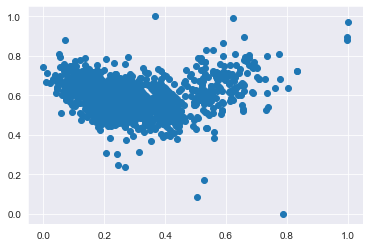

In [85]:
plt.scatter(norm_data(all_vars.fittedvalues),
           norm_data(all_vars.resid))
plt.show()

by observing the above graph we are not able to see any pattern in the data set 

# Residuals Vs Regressors

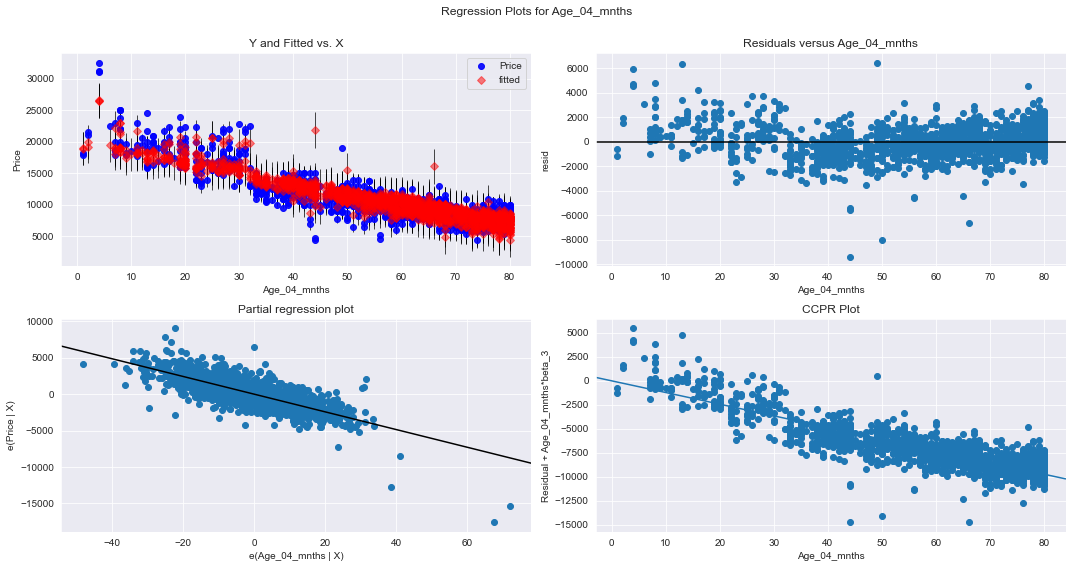

In [89]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(all_vars, "Age_04_mnths",fig=fig)
plt.show()

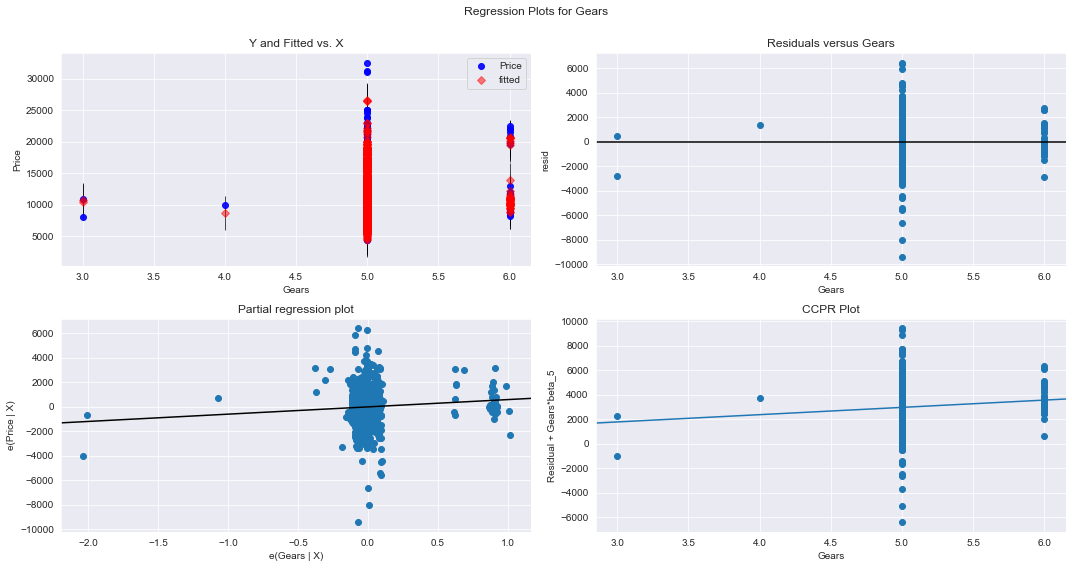

In [90]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(all_vars, "Gears",fig=fig)
plt.show()

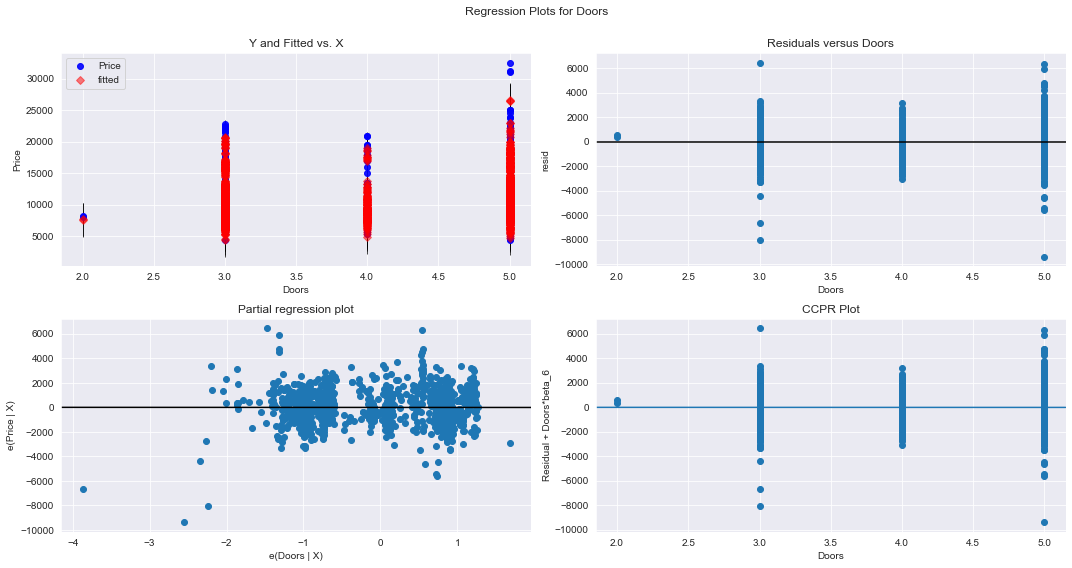

In [91]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(all_vars, "Doors",fig=fig)
plt.show()

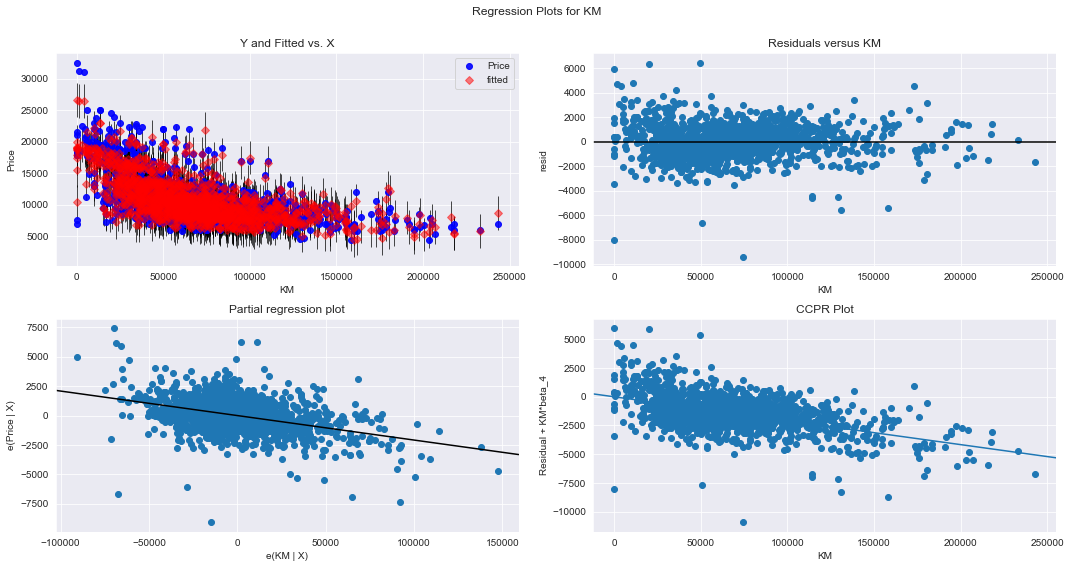

In [92]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(all_vars, "KM",fig=fig)
plt.show()

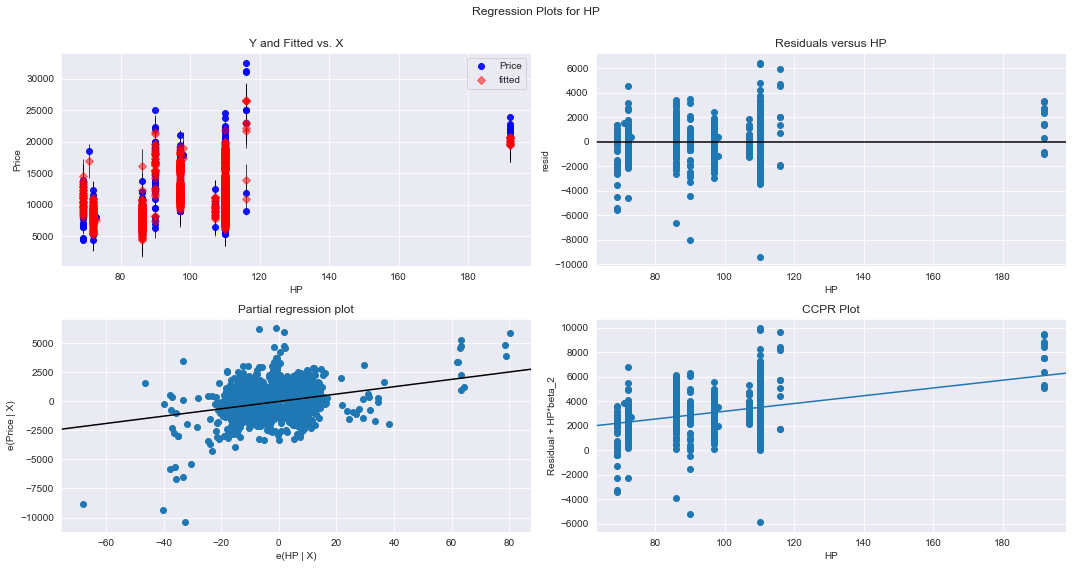

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(all_vars, "HP",fig=fig)
plt.show()

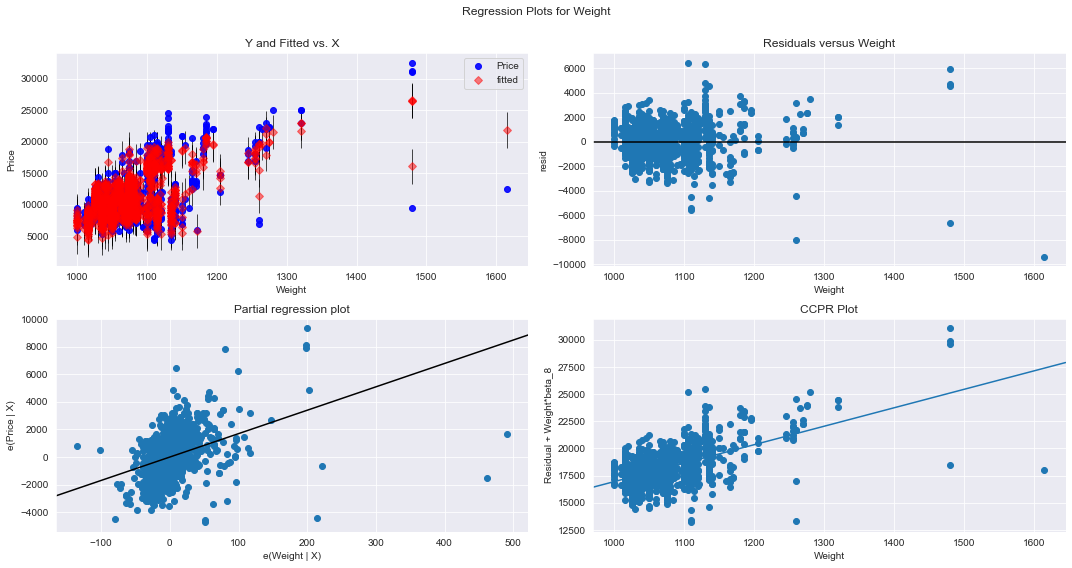

In [94]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(all_vars, "Weight",fig=fig)
plt.show()

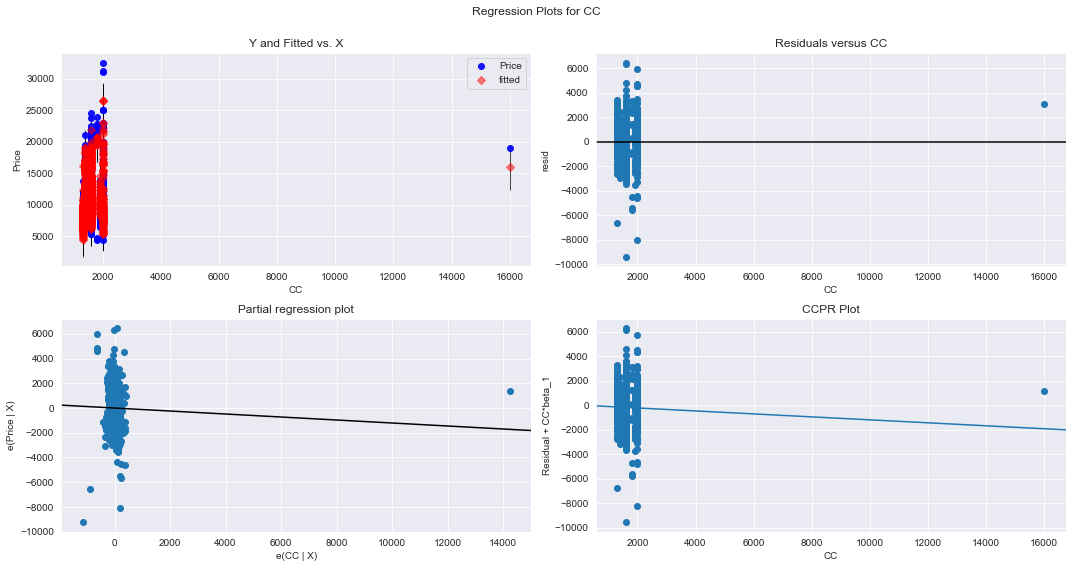

In [95]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(all_vars, "CC",fig=fig)
plt.show()

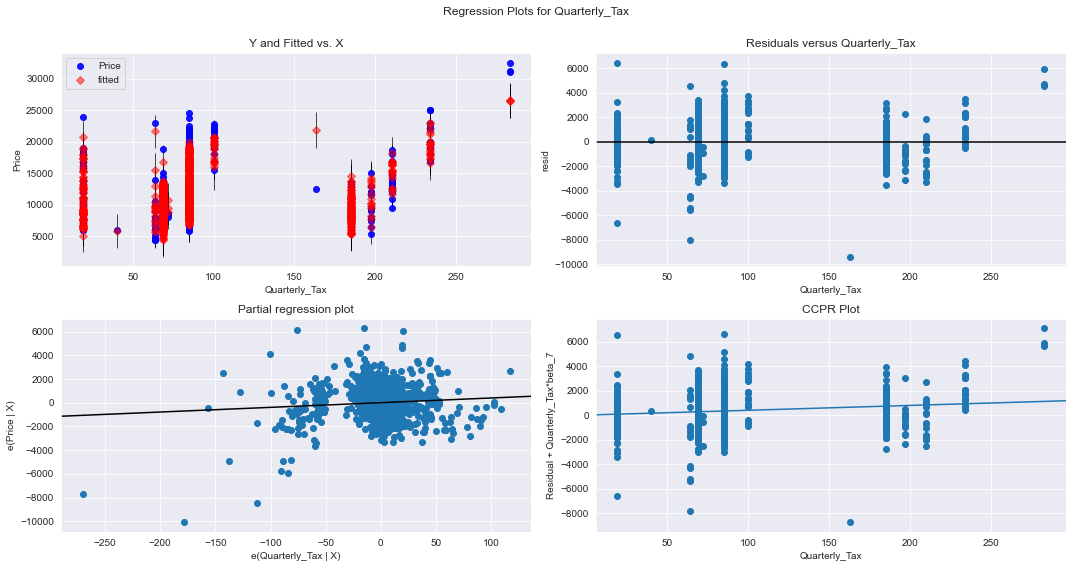

In [97]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(all_vars, "Quarterly_Tax",fig=fig)
plt.show()

In [ ]:
#y=data['Price']
#x=data[['Age_04_mnths','KM','HP','CC','Doors','Gears','Quarterly_Tax','Weight']]

# Model Deletion Diagnostics
Finding Influential variables and Outliers
Cooks Distance

In [98]:
#cooks distance
model_influence=all_vars.get_influence()
(c,_)=model_influence.cooks_distance

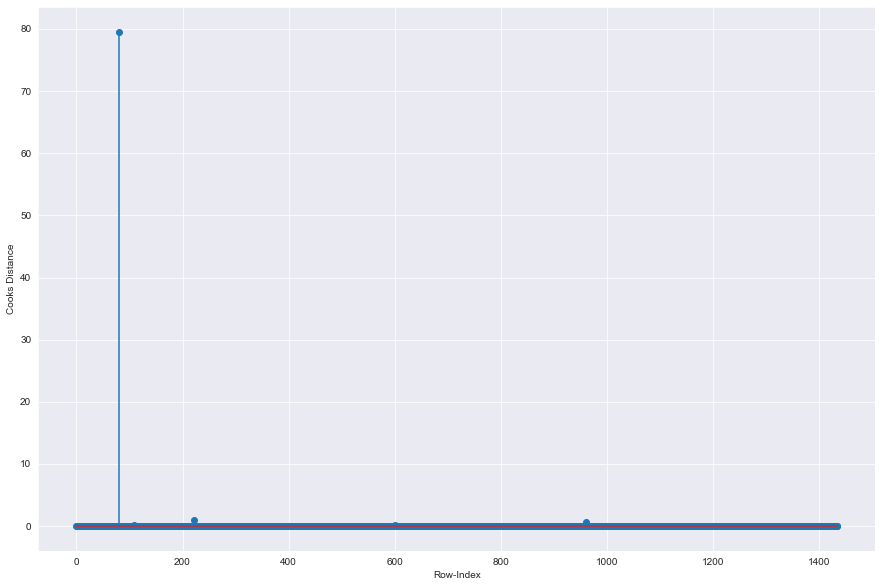

In [103]:
fig=plt.subplots(figsize=(15,10))
plt.stem(np.arange(len(data)),np.round(c, 3))
plt.xlabel('Row-Index')
plt.ylabel('Cooks Distance')
plt.show()

In [106]:
(np.argmax(c),np.max(c))

(80, 79.52010624119468)

Here the data point 80 is high inflential observatrions when compared to normal data

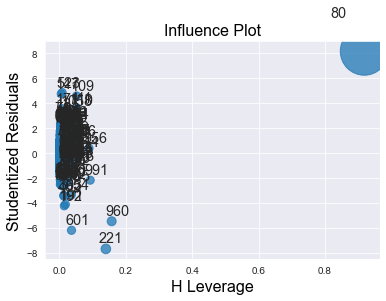

In [107]:
##influene plot

influence_plot(all_vars)
plt.show()

In [109]:
##calculate Leverage value
data.shape

(1436, 9)

In [115]:
k=data.shape[1]
n=data.shape[0]
levrage_cutoff=3*((k +1)/n)
levrage_cutoff

0.020891364902506964

The value greater than 0.20891 those values are cosniderd as influential or outliers Need to take an action

# Improving the Model

In [117]:
data[data.index.isin([80])]

,Price,Age_04_mnths,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [119]:
data.head(6)

,Price,Age_04_mnths,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170


By observing  the above influential observation with data usually "CC " has Higher value when compared to others

In [189]:
df=data.drop(data.index[[80]],axis=0).reset_index()


,index,Price,Age_04_mnths,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,5,69,1025
1431,1432,10845,72,19000,86,1300,3,5,69,1015
1432,1433,8500,71,17016,86,1300,3,5,69,1015
1433,1434,7250,70,16916,86,1300,3,5,69,1015


In [125]:
data=data.drop(['index'],axis=1)

In [126]:
data[data.index.isin([80])]

,Price,Age_04_mnths,KM,HP,CC,Doors,Gears,Quarterly_Tax,Weight
80,17250,29,20000,110,1600,5,5,85,1115


Building The Model with New data

In [201]:
final_model=smf.ols("Price~CC+HP+Age_04_mnths+KM+Gears+Doors+Quarterly_Tax+Weight",data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1186.
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        20:41:03   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1426   BIC:                         2.473e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6284.7401   1382.748     -4.545      0.000   -8997.180   -3572.301
CC               -2.5242      0.307     -8.216      0.000      -3.127      -1.922
HP               39.3463      2.911     13.516      0.000      33.636      45.057
Age_04_mnths   -120.4550      2.562    -47.021      0.000    -125.480    -115.430
KM               -0.0178      0.001    -13.973      0.000      -0.020      -0.015
Gears           523.9416    192.865      2.717      0.007     145.612     902.271
Doors           -27.2285     39.241     -0.694      0.488    -104.206      49.749
Quarterly_Tax     9.0440      1.425      6.348      0.000       6.249      11.839
Weight           20.1655      1.116     18.076      0.000      17.977      22.354
==============================================================================
Omnibus:                      246.945   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2706.374
Skew:                          -0.443   Prob(JB):                         0.00
Kurtosis:                       9.669   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
final_model.rsquared,final_model.aic

(0.8693790488655818, 24687.28102432684)

In [203]:
#droping Doors
final_model1=smf.ols("Price~CC+HP+Age_04_mnths+KM+Gears+Quarterly_Tax+Weight",data=df).fit()
final_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        20:41:17   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
CC               -2.5069      0.306     -8.188      0.000      -3.107      -1.906
HP               39.1593      2.898     13.512      0.000      33.474      44.844
Age_04_mnths   -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM               -0.0179      0.001    -14.029      0.000      -0.020      -0.015
Gears           549.7311    189.216      2.905      0.004     178.561     920.902
Quarterly_Tax     9.0759      1.424      6.374      0.000       6.283      11.869
Weight           19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
final_model1.rsquared,final_model1.aic

(0.8693349475698542, 24685.765438793034)

## By Observing the "final_model1" model has low Aic value and Same R2 and Same Adjusted R2 values  in my case "doors" are not that much important feature to  predict the price while  compared to other features